In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df1=pd.read_excel('Price and Withdrawals 2016.xlsx')
df2=pd.read_excel('Price and Withdrawals 2017.xlsx')
df3=pd.read_excel('Price and Withdrawals 2018.xlsx')
df4=pd.read_excel('Price and Withdrawals 2019.xlsx')
df5=pd.read_excel('Price and Withdrawals 2020.xlsx')

In [33]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

df_combined.to_csv('combined_data.csv', index=False)

In [34]:
df=pd.read_csv('combined_data.csv')

In [35]:
df.head()

,gas_date,schedule_interval,transmission_id,sched_inj_gj,sched_wdl_gj,price_value,administered_price,actual_wdl_gj,actual_inj_gj
0,2016-12-31,1,171272,377342.0000,386467.3147,3.5000,NaN,389754.0053,387728.5952
1,2016-12-31,2,171282,372637.0000,393882.2553,2.5081,NaN,389754.0053,387728.5952
2,2016-12-31,3,171290,372637.0000,390697.5883,3.0681,NaN,389754.0053,387728.5952
3,2016-12-31,4,171298,377637.4882,392859.8289,3.5000,NaN,389754.0053,387728.5952
4,2016-12-31,5,171303,380262.0200,389405.6548,3.6939,NaN,389754.0053,387728.5952


In [36]:
df.isnull().sum()

gas_date                 0
schedule_interval        0
transmission_id          0
sched_inj_gj             0
sched_wdl_gj             0
price_value              0
administered_price    9129
actual_wdl_gj            0
actual_inj_gj            0
dtype: int64

In [37]:
df.shape

(9135, 9)

In [38]:
df['administered_price'].unique()

array([ nan, 39. , 16. , 14. , 35. ,  8.2,  7.5])

In [39]:
df=df.dropna(axis=1)

In [40]:
df.columns

Index(['gas_date', 'schedule_interval', 'transmission_id', 'sched_inj_gj',
       'sched_wdl_gj', 'price_value', 'actual_wdl_gj', 'actual_inj_gj'],
      dtype='object')

Each report contains: 

    the gas date 
    schedule interval (indicating 1 to 5, where 1 refers to 6:00 AM to 10:00 AM, 2 will relate to 10:00 AM to 2:00 PM, and so forth)
    The DWGM Prices and Demand file will be updated on or before the 5th business day from the start of the month
    transmission identifier for the schedule
    scheduled injections in gigajoules
    scheduled withdrawals in gigajoules
    price for the scheduling horizons
    Administered Price (the value in the admin price field is null when no admin prices applies and when there has been an admin price, it will be displayed and the price_value will show the last approved schedule price.)
    Actual metered withdrawals in gigajoules
    Actual metered injections in gigajoules

In [41]:
df['year']=df['gas_date'].str.split('-').str[0]

In [42]:
df['day_of_the_week']=df['gas_date'].str.split('-').str[2]
df['month']=df['gas_date'].str.split('-').str[1]

In [43]:
df['duration_in_hours']=4

In [44]:
df.head()

,gas_date,schedule_interval,transmission_id,sched_inj_gj,sched_wdl_gj,price_value,actual_wdl_gj,actual_inj_gj,year,day_of_the_week,month,duration_in_hours
0,2016-12-31,1,171272,377342.0000,386467.3147,3.5000,389754.0053,387728.5952,2016,31,12,4
1,2016-12-31,2,171282,372637.0000,393882.2553,2.5081,389754.0053,387728.5952,2016,31,12,4
2,2016-12-31,3,171290,372637.0000,390697.5883,3.0681,389754.0053,387728.5952,2016,31,12,4
3,2016-12-31,4,171298,377637.4882,392859.8289,3.5000,389754.0053,387728.5952,2016,31,12,4
4,2016-12-31,5,171303,380262.0200,389405.6548,3.6939,389754.0053,387728.5952,2016,31,12,4


In [45]:
df['day_of_the_week'].nunique()

31

In [46]:
df['injection_diff'] = df['actual_inj_gj'] - df['sched_inj_gj']
df['withdrawal_diff'] = df['actual_wdl_gj'] - df['sched_wdl_gj']

In [47]:
df=df.drop(['gas_date','schedule_interval','transmission_id'],axis=1)

In [48]:
df.head()

,sched_inj_gj,sched_wdl_gj,price_value,actual_wdl_gj,actual_inj_gj,year,day_of_the_week,month,duration_in_hours,injection_diff,withdrawal_diff
0,377342.0000,386467.3147,3.5000,389754.0053,387728.5952,2016,31,12,4,10386.5952,3286.6906
1,372637.0000,393882.2553,2.5081,389754.0053,387728.5952,2016,31,12,4,15091.5952,-4128.2500
2,372637.0000,390697.5883,3.0681,389754.0053,387728.5952,2016,31,12,4,15091.5952,-943.5830
3,377637.4882,392859.8289,3.5000,389754.0053,387728.5952,2016,31,12,4,10091.1070,-3105.8236
4,380262.0200,389405.6548,3.6939,389754.0053,387728.5952,2016,31,12,4,7466.5752,348.3505


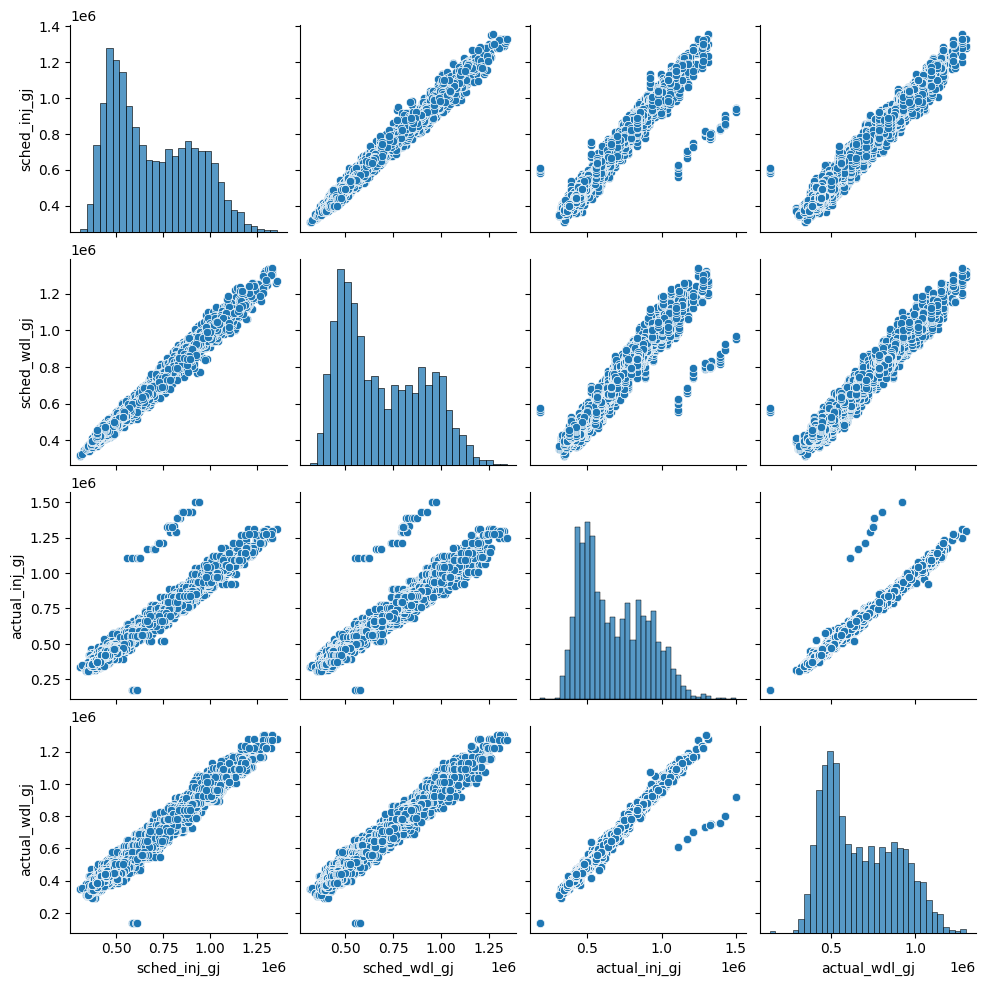

,sched_inj_gj,sched_wdl_gj,price_value,actual_wdl_gj,actual_inj_gj,year,day_of_the_week,month,duration_in_hours,injection_diff,withdrawal_diff
sched_inj_gj,1.000000,0.993489,0.235788,0.983401,0.971924,-4.276753e-02,1.968017e-03,2.164265e-01,NaN,-0.149481,-0.150600
sched_wdl_gj,0.993489,1.000000,0.204127,0.982742,0.967987,-5.135138e-02,5.109804e-03,2.072088e-01,NaN,-0.138457,-0.189293
price_value,0.235788,0.204127,1.000000,0.219366,0.230071,-1.408640e-01,-3.182381e-02,-2.929115e-02,NaN,-0.031451,0.060954
actual_wdl_gj,0.983401,0.982742,0.219366,1.000000,0.978903,-7.000301e-02,7.823451e-03,2.197768e-01,NaN,-0.049876,-0.004389
actual_inj_gj,0.971924,0.967987,0.230071,0.978903,1.000000,-6.715476e-02,1.597033e-02,2.263336e-01,NaN,0.087369,-0.036615
year,-0.042768,-0.051351,-0.140864,-0.070003,-0.067155,1.000000e+00,-5.266922e-15,1.213989e-13,NaN,-0.101133,-0.093991
day_of_the_week,0.001968,0.005110,-0.031824,0.007823,0.015970,-5.266922e-15,1.000000e+00,9.702506e-03,NaN,0.058779,0.013905
month,0.216426,0.207209,-0.029291,0.219777,0.226334,1.213989e-13,9.702506e-03,1.000000e+00,NaN,0.034815,0.046472
duration_in_hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injection_diff,-0.149481,-0.138457,-0.031451,-0.049876,0.087369,-1.011332e-01,5.877871e-02,3.481479e-02,NaN,1.000000,0.483732


In [19]:
sns.pairplot(df[['sched_inj_gj', 'sched_wdl_gj', 'actual_inj_gj', 'actual_wdl_gj']])
plt.show()

df.corr()

In [20]:
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate descriptive statistics
print(numerical_cols.describe())

       sched_inj_gj  sched_wdl_gj  price_value  actual_wdl_gj  actual_inj_gj  \
count  9.135000e+03  9.135000e+03  9135.000000   9.135000e+03   9.135000e+03   
mean   6.914850e+05  6.915630e+05     7.553424   6.737772e+05   6.744050e+05   
std    2.197488e+05  2.181009e+05     2.656557   2.141598e+05   2.181139e+05   
min    3.074993e+05  3.147506e+05     0.000000   1.361543e+05   1.779349e+05   
25%    5.001846e+05  5.021172e+05     5.500000   4.920464e+05   4.914736e+05   
50%    6.415532e+05  6.384420e+05     7.968800   6.300883e+05   6.234922e+05   
75%    8.767666e+05  8.833145e+05     9.360000   8.537855e+05   8.483658e+05   
max    1.354195e+06  1.340993e+06    44.856600   1.302598e+06   1.503344e+06   

       duration_in_hours  injection_diff  withdrawal_diff  
count             9135.0     9135.000000      9135.000000  
mean                 4.0   -17079.943363    -17785.740987  
std                  0.0    51904.535562     40344.959253  
min                  4.0  -431725.17562

<Axes: >

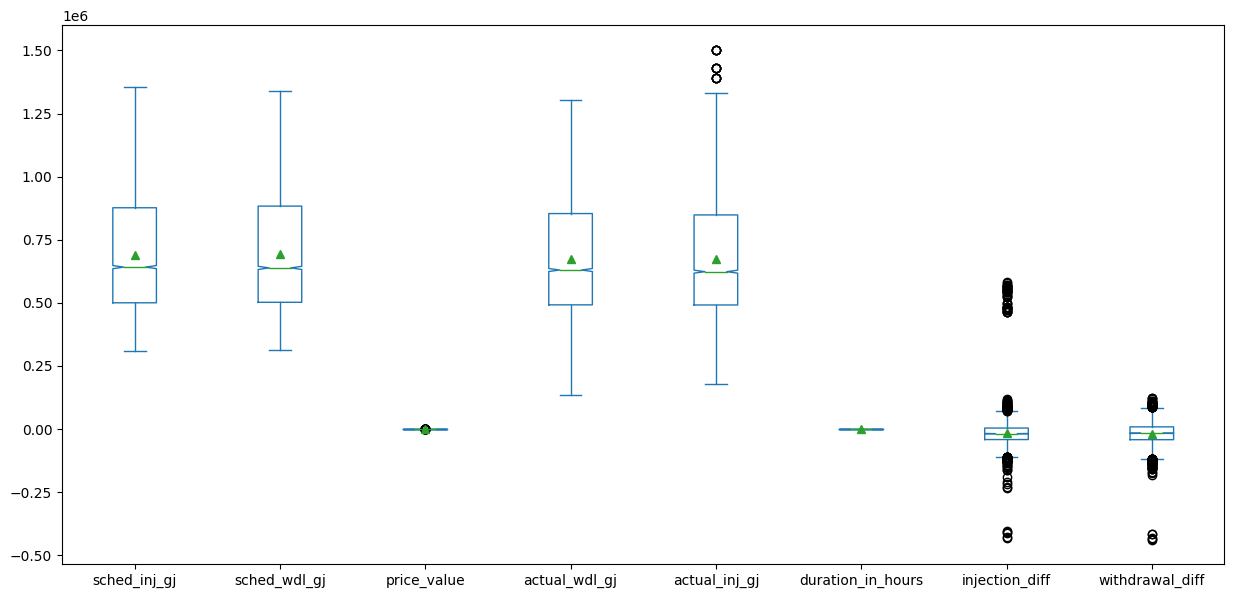

In [21]:
numerical_cols.plot(kind='box', figsize=(15,7),  # Adjust figure size for better viewing
                   widths=0.3,  # Adjust box width
                   notch=True,  # Add notches
                   showmeans=True)  # Show mean values


We can say that, injection_diff and withdraw_diff has vast amount of outliers and 
columns such as actual_inj_gj has little outliers.

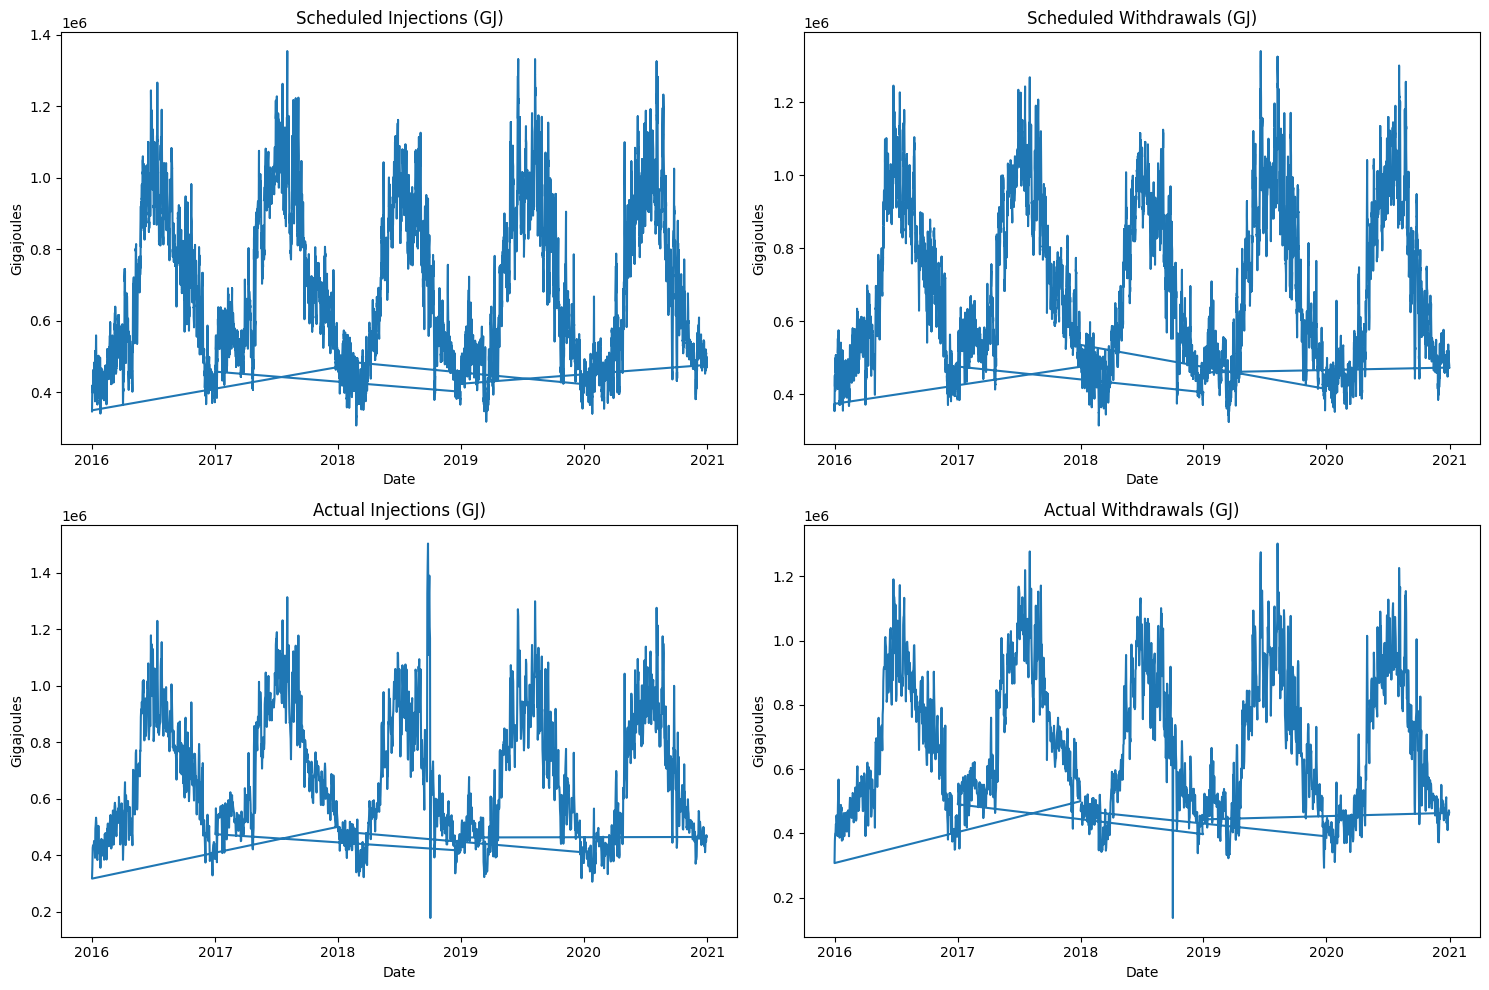

In [27]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'df' with the columns 'gas_date', 'sched_inj_gj', 'sched_wdl_gj', 'actual_inj_gj', and 'actual_wdl_gj'

# Convert 'gas_date' to datetime
df['gas_date'] = pd.to_datetime(df['gas_date'])

# Plot time series
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(df['gas_date'], df['sched_inj_gj'])
plt.title('Scheduled Injections (GJ)')
plt.xlabel('Date')
plt.ylabel('Gigajoules')

plt.subplot(2, 2, 2)
plt.plot(df['gas_date'], df['sched_wdl_gj'])
plt.title('Scheduled Withdrawals (GJ)')
plt.xlabel('Date')
plt.ylabel('Gigajoules')

plt.subplot(2, 2, 3)
plt.plot(df['gas_date'], df['actual_inj_gj'])
plt.title('Actual Injections (GJ)')
plt.xlabel('Date')
plt.ylabel('Gigajoules')

plt.subplot(2, 2, 4)
plt.plot(df['gas_date'], df['actual_wdl_gj'])
plt.title('Actual Withdrawals (GJ)')
plt.xlabel('Date')
plt.ylabel('Gigajoules')

plt.tight_layout()
plt.show()

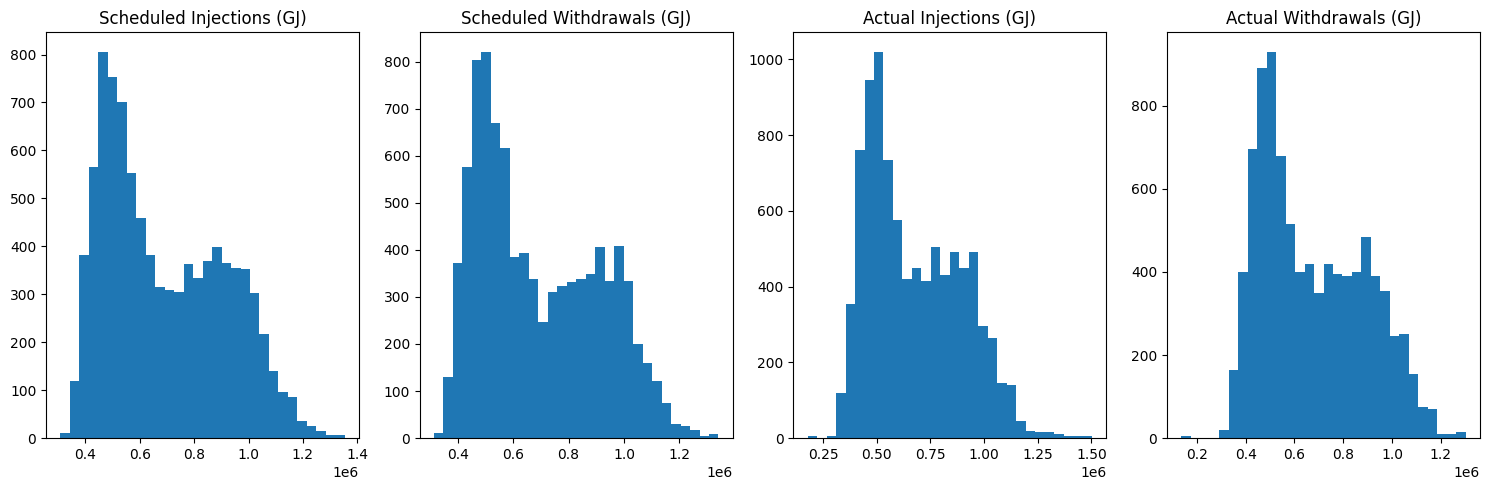

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.hist(df['sched_inj_gj'], bins=30)
plt.title('Scheduled Injections (GJ)')

plt.subplot(1, 4, 2)
plt.hist(df['sched_wdl_gj'], bins=30)
plt.title('Scheduled Withdrawals (GJ)')

plt.subplot(1, 4, 3)
plt.hist(df['actual_inj_gj'], bins=30)
plt.title('Actual Injections (GJ)')

plt.subplot(1, 4, 4)
plt.hist(df['actual_wdl_gj'], bins=30)
plt.title('Actual Withdrawals (GJ)')

plt.tight_layout()
plt.show()

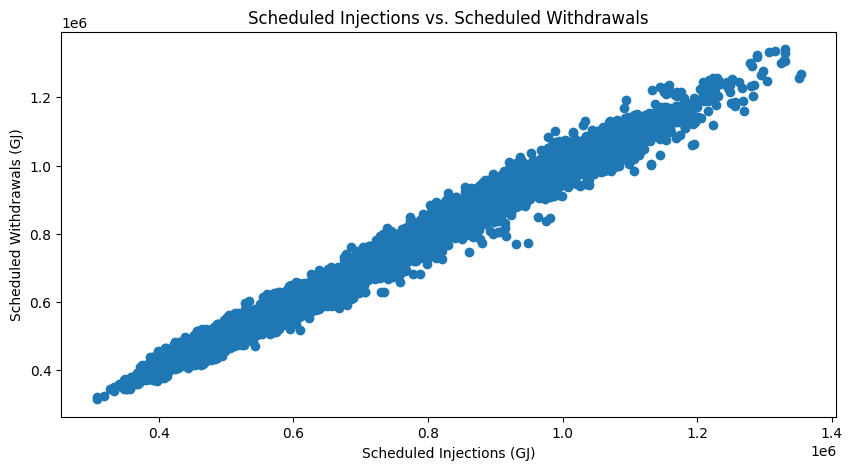

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(df['sched_inj_gj'], df['sched_wdl_gj'])
plt.title('Scheduled Injections vs. Scheduled Withdrawals')
plt.xlabel('Scheduled Injections (GJ)')
plt.ylabel('Scheduled Withdrawals (GJ)')
plt.show()

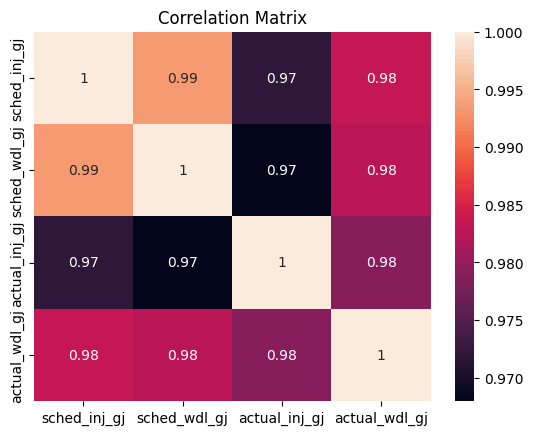

In [30]:
correlation_matrix = df[['sched_inj_gj', 'sched_wdl_gj', 'actual_inj_gj', 'actual_wdl_gj']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

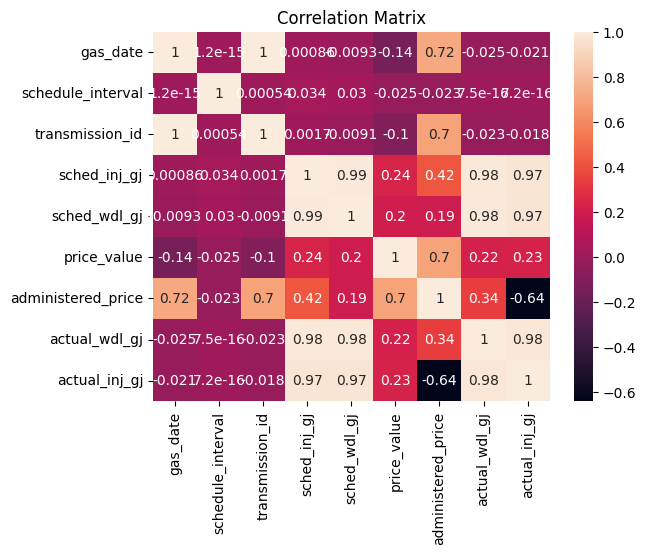

In [31]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [50]:
df.columns

Index(['sched_inj_gj', 'sched_wdl_gj', 'price_value', 'actual_wdl_gj',
       'actual_inj_gj', 'year', 'day_of_the_week', 'month',
       'duration_in_hours', 'injection_diff', 'withdrawal_diff'],
      dtype='object')

Considering price_value as the target value then the ml model will be implemented as : 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [57]:
# Split data into features and target variable
X = df.drop('price_value', axis=1)
y = df['price_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Support Vector Machine (SVR)": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name}:")
    print("MSE:", mse)
    print("R-squared:", r2)


Linear Regression:
MSE: 5.933835681952235
R-squared: 0.14389337386738243

Ridge Regression:
MSE: 5.934126893641229
R-squared: 0.1438513591790902

Lasso Regression:
MSE: 6.931883010341434
R-squared: -0.00010032208660470943

ElasticNet Regression:
MSE: 6.822395415085482
R-squared: 0.015696046535977115

Support Vector Machine (SVR):
MSE: 2.5802951293364575
R-squared: 0.6277268404446454

Decision Tree Regressor:
MSE: 2.6362071280405033
R-squared: 0.6196601134342501

Random Forest Regressor:
MSE: 1.1503777881581971
R-squared: 0.8340287632174536

Gradient Boosting Regressor:
MSE: 2.0617220688289977
R-squared: 0.7025441857554691

AdaBoost Regressor:
MSE: 4.824184005526397
R-squared: 0.3039888338371778


From this evaluation we can see that Random Forest Regressor is the best model followed by Gradient Boosting Regressor and then Support Vector Machine.


Model with lowest MSE: Random Forest Regressor (MSE: 1.15)


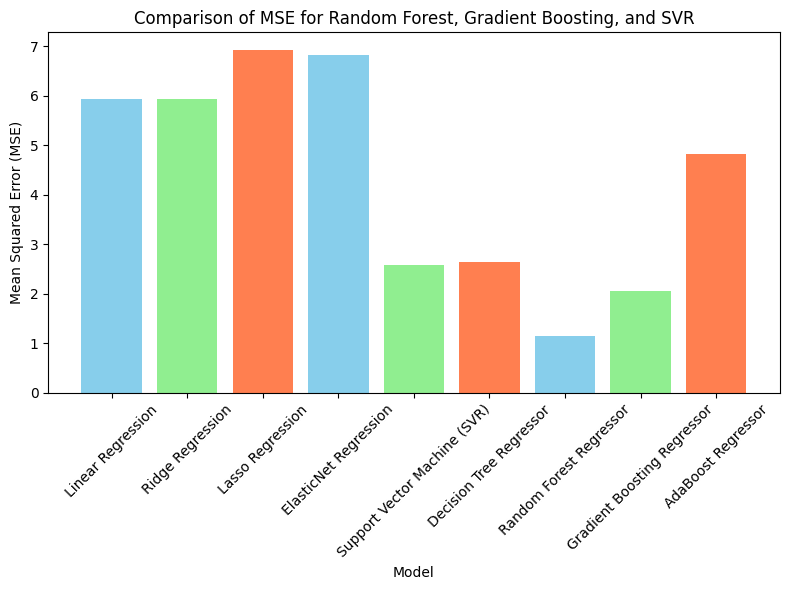

In [61]:
# Evaluate and store results
mse_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[model_name] = mse

# Compare MSE results
best_model_name = min(mse_results, key=mse_results.get)
best_mse = mse_results[best_model_name]
print(f"Model with lowest MSE: {best_model_name} (MSE: {best_mse:.2f})")

# Visualize MSE results (bar chart)
model_names = list(mse_results.keys())
mse_values = list(mse_results.values())
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'lightgreen', 'coral'])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of MSE for Random Forest, Gradient Boosting, and SVR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [63]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

In [65]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [66]:
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5)
svm_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=5)

In [ ]:
rf_grid_search.fit(X_train_scaled, y_train)
gb_grid_search.fit(X_train_scaled, y_train)
svm_grid_search.fit(X_train_scaled, y_train)

In [ ]:
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

best_gb_params = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_

best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

In [ ]:
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
y_pred_gb_tuned = best_gb_model.predict(X_test_scaled)
y_pred_svm_tuned = best_svm_model.predict(X_test_scaled)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

mse_svm_tuned = mean_squared_error(y_test, y_pred_svm_tuned)
r2_svm_tuned = r2_score(y_test, y_pred_svm_tuned)

print("Random Forest Regressor (Tuned):")
print("MSE:", mse_rf_tuned)
print("R-squared:", r2_rf_tuned)

print("\nGradient Boosting Regressor (Tuned):")
print("MSE:", mse_gb_tuned)
print("R-squared:", r2_gb_tuned)

print("\nSupport Vector Machine (Tuned):")
print("MSE:", mse_svm_tuned)
print("R-squared:", r2_svm_tuned)